Problem statement <br>
Perform Data cleaning and Data Pre-Processing if Necessary.<br>●Use the various methods such as Handling null values,One-HotEncoding,Imputation and Scaling of Data Pre-Processing where necessary.<br>●Derive some insights from the dataset.●Apply Linear,Ridge&Lasso Regression on the data and find out the best algorithm for the data based on various regression metrics.


Dataset link :- https://drive.google.com/uc?export=download&id=1PFcbEoTkO1Yh_CQk3Si7v-qGZjK479Z_

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import datetime

In [2]:
pwd

'/content'

In [3]:
df = pd.read_csv('uber.csv')

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [8]:
df.shape

(35725, 9)

In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,3.572500e+04,35725.000000,35724.000000,35724.000000,35724.000000,35724.000000,35724.000000
mean,2.765762e+07,11.394681,-72.561212,39.942645,-72.572503,39.943957,1.677024
std,1.604217e+07,10.085005,10.911110,6.047059,10.852786,6.043435,1.294493
min,4.800000e+01,0.000000,-748.016667,-74.015515,-737.916665,-74.008745,0.000000
25%,1.367902e+07,6.000000,-73.992033,40.734753,-73.991475,40.733846,1.000000
50%,2.757853e+07,8.500000,-73.981821,40.752563,-73.980170,40.752855,1.000000
75%,4.151460e+07,12.900000,-73.967196,40.767152,-73.963545,40.768076,2.000000
max,5.542169e+07,350.000000,40.774042,45.031653,40.828377,45.031598,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35725 entries, 0 to 35724
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         35725 non-null  int64  
 1   key                35725 non-null  object 
 2   fare_amount        35725 non-null  float64
 3   pickup_datetime    35725 non-null  object 
 4   pickup_longitude   35724 non-null  float64
 5   pickup_latitude    35724 non-null  float64
 6   dropoff_longitude  35724 non-null  float64
 7   dropoff_latitude   35724 non-null  float64
 8   passenger_count    35724 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.5+ MB


In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     1
pickup_latitude      1
dropoff_longitude    1
dropoff_latitude     1
passenger_count      1
dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')



*   'Pickup_datetime' column is in object type we have to change in datetime format<br>

*   'key' column is object type and also it is not usefull feature so we are dropping it



*   'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count' columns having Null value,
       we can delete the row it wont effect the data i think.




In [24]:
# changing 'pickup_datetime' column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc = True)

In [26]:
df['pickup_datetime'].dtype

datetime64[ns, UTC]

In [28]:
# Converting the pickup_datetime feature in to day, month, year, weekday and hour
df['date'] = df['pickup_datetime'].apply(lambda d: d.day)
df['month'] = df['pickup_datetime'].apply(lambda d: d.month)
df['year'] = df['pickup_datetime'].apply(lambda d: d.year)
df['day'] = df['pickup_datetime'].apply(lambda d: d.weekday)
df['hour'] = df['pickup_datetime'].apply(lambda d: d.hour)

In [29]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'date', 'month', 'year', 'day',
       'hour'],
      dtype='object')

In [30]:
# droping datetime feature
df =  df.drop(['pickup_datetime'], axis=1)

In [31]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,year,day,hour
0,24238194,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,7,5,2015,3,19
1,27835199,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,17,7,2009,4,20
2,44984355,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,24,8,2009,0,21
3,25894730,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,26,6,2009,4,8
4,17610152,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,28,8,2014,3,17


In [32]:
df.drop(['key'], axis=1, inplace=True)

In [33]:
# Dropping null values
df.dropna(inplace = True)
df.isnull().sum()

Unnamed: 0           0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
date                 0
month                0
year                 0
day                  0
hour                 0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

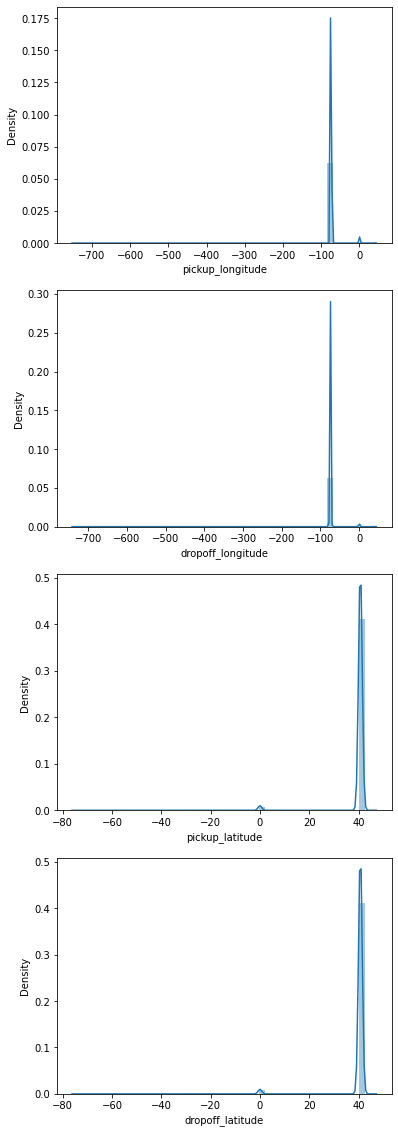

In [34]:
# Plotting distplot 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'
fig, axs = plt.subplots(4, figsize=(6,20))
sns.distplot(df['pickup_longitude'], ax=axs[0])
sns.distplot(df['dropoff_longitude'], ax=axs[1])
sns.distplot(df['pickup_latitude'], ax=axs[2])
sns.distplot(df['dropoff_latitude'], ax=axs[3])

In [35]:
# Dropping the values in 'fare_amount' & 'passenger_count' according the given condition
df.drop(df[df['fare_amount']<=0].index,inplace=True)
df.drop(df[df['passenger_count']==0].index,inplace=True)

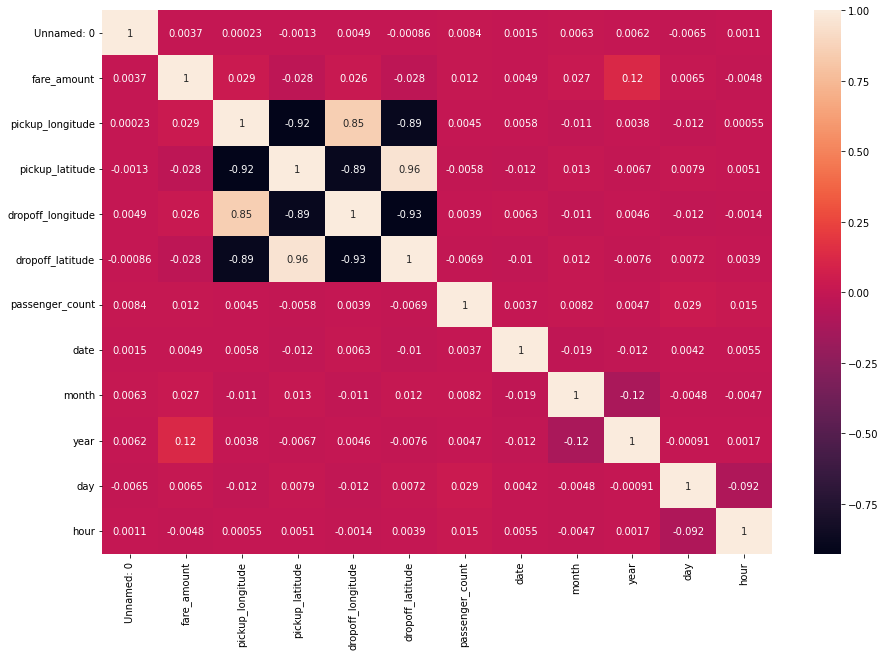

In [36]:
# Plotting a Heatmap to see corelation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [37]:
# Creating 'x' & 'y' variables for train test split
x = df.drop('fare_amount',axis=1)
y = df['fare_amount']

### ***Splitting Data into Train Test***

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import r2_score,  mean_squared_error

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26700, 11)
(8901, 11)
(26700,)
(8901,)


### ***Linear Regression***

In [41]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred = reg.predict(x_test)

In [43]:
print("MSE => ", mean_squared_error(y_test, y_pred))
print("R2 Score => ",r2_score(y_test, y_pred))

MSE =>  100.49895107484559
R2 Score =>  0.01389647872348998


### ***Lasso Reression***

In [44]:
las = Lasso()
las.fit(x_train,y_train)

Lasso()

In [45]:
y_pred = las.predict(x_test)
print("MSE => ", mean_squared_error(y_test, y_pred))
print("R2 Score => ",r2_score(y_test, y_pred))

MSE =>  100.5398493813089
R2 Score =>  0.013495181360817288


### ***Ridge Regression***

In [46]:
rid = Ridge()
rid.fit(x_train,y_train)

Ridge()

In [47]:
y_pred = rid.predict(x_test)
print("MSE => ", mean_squared_error(y_test, y_pred))
print("R2 Score => ",r2_score(y_test, y_pred))

MSE =>  100.49892543999397
R2 Score =>  0.013896730254646994
